# Week 2: Tasks graded by peers.


For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Organize the input data

In [3]:
# Import data file
df = pd.read_csv("SPE00120089.csv")

# Clean the input data for simplicity
df = df.drop(["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME", "PRCP", "PRCP_ATTRIBUTES",
             "SNWD", "SNWD_ATTRIBUTES", "TMAX_ATTRIBUTES", "TMIN_ATTRIBUTES", "TAVG",
             "TAVG_ATTRIBUTES"], axis=1)

print("Number of elements =", len(df))

Number of elements = 17918


In [4]:
# Split the Date as year, month, and day
year_list = []
month_list = []
day_list = []

for item in df["DATE"]:
    date_split = item.split('-')
    year_list.append(int(date_split[0]))
    month_list.append(int(date_split[1]))
    day_list.append(int(date_split[2]))
    
df["Year"] = year_list
df["Month"] = month_list
df["Day"] = day_list

df = df.drop(["DATE"], axis=1)

### Remove leap days

In [5]:
is_leap = df.loc[:, "Month"] == 2
is_leap = is_leap.values.tolist()
df_aux = df.loc[is_leap]
df_aux.head()

is_leap = df_aux.loc[:, "Day"] == 29
is_leap = is_leap.values.tolist()
df_aux = df_aux.loc[is_leap]

leap_index = df_aux.query('Month == 2').index.tolist()

df = df.drop(leap_index, axis=0)
print("Number of elements = ", len(df))

Number of elements =  17906


### Remove data out of range

In [6]:
# Remove data before 2005
is_aux = df.loc[:, "Year"] >= 2005
df = df.loc[is_aux]

# Remove data after 2015
is_aux = df.loc[:, "Year"] <= 2015
df = df.loc[is_aux]

print("Number of elements = ", len(df))

Number of elements =  4015


### Temperature calculation in the [2005, 2014] range

In [7]:
# Select all data before 2014
is_aux = df.loc[:, "Year"] <= 2014
df_range = df.loc[is_aux]
df_range.reset_index(drop=True, inplace=True)
df_range.head()

,TMAX,TMIN,Year,Month,Day
0,149.0,-42.0,2005,1,1
1,170.0,-33.0,2005,1,2
2,148.0,-35.0,2005,1,3
3,151.0,-21.0,2005,1,4
4,148.0,-38.0,2005,1,5


#### Max. Temperature calculation

In [8]:
# Define a new dataframe to storage all plot data
df_ymax = pd.DataFrame()
df_ymax["TMAX"] = None
df_ymax["TMIN"] = None
df_ymax["Year"] = None
df_ymax["Month"] = None
df_ymax["Day"] = None

# Look for the max. temperatura per day in the year range 2005-2014
for i in range(len(df_range)):
    is_aux = df_range.loc[:, "Month"] == df_range["Month"][i]
    is_aux = is_aux.values.tolist()
    df_aux = df_range.loc[is_aux]

    is_aux = df_aux.loc[:, "Day"] == df_range["Day"][i]
    is_aux = is_aux.values.tolist()
    df_aux = df_aux.loc[is_aux]

    df_aux = df_aux.sort_values(by="TMAX", ascending = False)
    df_aux = df_aux.drop_duplicates(['Month'], keep='first')

    df_ymax = pd.concat([df_ymax, df_aux])

df_ymax = df_ymax.drop(["TMIN", "Year"], axis = 1)
print("Number of elements = ", len(df_ymax))

Number of elements =  3650


In [9]:
# Remove all duplicated data
df_ymax = df_ymax.drop_duplicates()
df_ymax.reset_index(drop=True, inplace=True)
print("Number of elements = ", len(df_ymax))

Number of elements =  365


#### Min. Temperature calculation

In [10]:
# Define a new dataframe to storage all plot data
df_ymin = pd.DataFrame()
df_ymin["TMAX"] = None
df_ymin["TMIN"] = None
df_ymin["Year"] = None
df_ymin["Month"] = None
df_ymin["Day"] = None

# Look for the min. temperatura per day in the year range 2005-2014
for i in range(len(df_range)):
    is_aux = df_range.loc[:, "Month"] == df_range["Month"][i]
    is_aux = is_aux.values.tolist()
    df_aux = df_range.loc[is_aux]

    is_aux = df_aux.loc[:, "Day"] == df_range["Day"][i]
    is_aux = is_aux.values.tolist()
    df_aux = df_aux.loc[is_aux]

    df_aux = df_aux.sort_values(by="TMIN", ascending = True)
    df_aux = df_aux.drop_duplicates(['Month'], keep='first')

    df_ymin = pd.concat([df_ymin, df_aux])

df_ymin = df_ymin.drop(["TMAX", "Year"], axis = 1)
print("Number of elements = ", len(df_ymin))

Number of elements =  3650


In [11]:
# Remove all duplicated data
df_ymin = df_ymin.drop_duplicates()
df_ymin.reset_index(drop=True, inplace=True)
print("Number of elements = ", len(df_ymin))

Number of elements =  365


### Break temperature 2015 calculation

In [12]:
# Select all data before 2014
is_aux = df.loc[:, "Year"] > 2014
df_break = df.loc[is_aux]
df_break.reset_index(drop=True, inplace=True)
print("Number of elements = ", len(df_break))
df_break.head()

Number of elements =  365


,TMAX,TMIN,Year,Month,Day
0,148.0,-70.0,2015,1,1
1,157.0,-55.0,2015,1,2
2,175.0,-52.0,2015,1,3
3,179.0,-53.0,2015,1,4
4,169.0,-58.0,2015,1,5


In [13]:
# Look for the days that breaks the max. temperature record
break_max = []
for i in range(len(df_break)):
    if df_break["TMAX"][i] > df_ymax["TMAX"][i]:
        break_max.append([i, df_break["TMAX"][i]])
        
break_max = np.array(break_max)

In [14]:
# Look for the days that breaks the min. temperature record
break_min = []
for i in range(len(df_break)):
    if df_break["TMIN"][i] < df_ymin["TMIN"][i]:
        break_min.append([i, df_break["TMIN"][i]])
        
break_min = np.array(break_min)

# Plot data

<IPython.core.display.Javascript object>


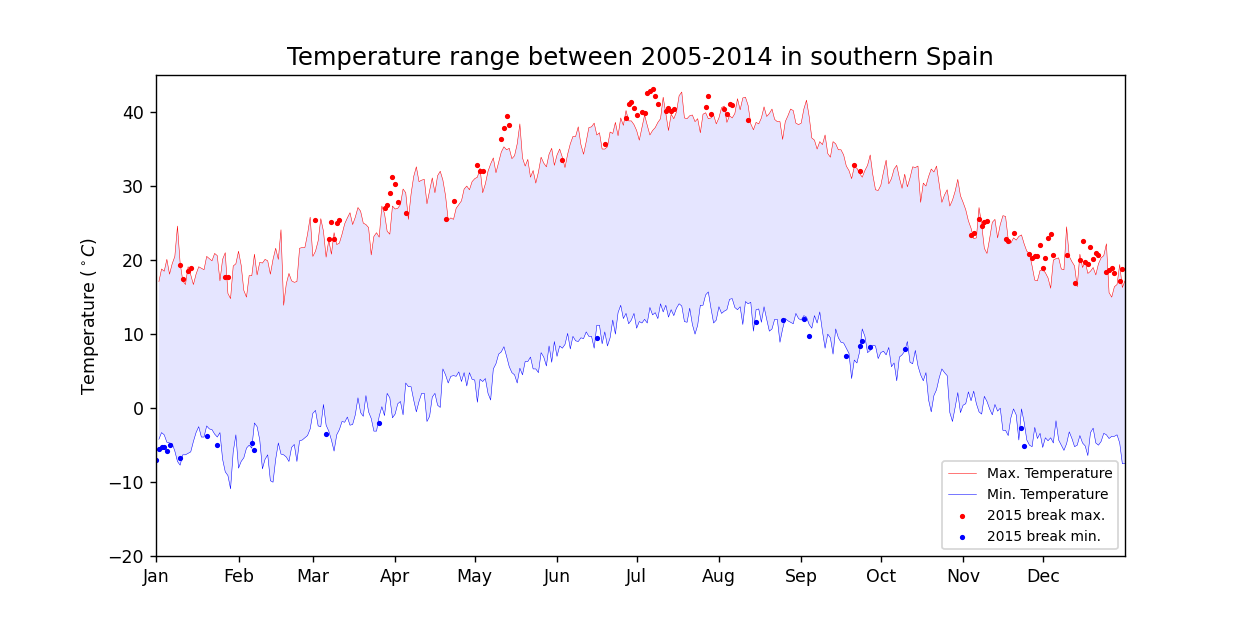

(0.0, 365.0, -20.0, 45.0)

In [19]:
x_values = range(1, 366)

plt.figure(figsize=(10,5))
plt.plot(x_values, df_ymax["TMAX"]/10, "r-", linewidth=0.3, label="Max. Temperature")
plt.plot(x_values, df_ymin["TMIN"]/10, "b-", linewidth=0.3, label="Min. Temperature")
plt.gca().fill_between(x_values, df_ymax["TMAX"]/10, df_ymin["TMIN"]/10, facecolor='blue', alpha=0.1)
plt.scatter(break_max[:, 0], break_max[:, 1]/10, color="r", s=4, label="2015 break max.")
plt.scatter(break_min[:, 0], break_min[:, 1]/10, color="b", s=4, label="2015 break min.")

plt.ylabel("Temperature ($^\circ C$)")
plt.title('Temperature range between 2005-2014 in southern Spain', size=14)
plt.legend(loc=4, fontsize=8)

tick = [0,31,59,90,120,151,181,212,243,273,304,334]
plt.xticks(tick, ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax = plt.gca() 
ax.axis([0,365,-20,45])